<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/DC%20Projects/Risk_Returns__Sharpe_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Risk and Returns - Sharpe Ratio**

The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency.

In [0]:
# Installing required modules
#!pip install quandl
#!pip install yfinance

# Importing required modules
import quandl
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
start = '2016-01-04'
end = '2016-12-30'

quandl.ApiConfig.api_key = 'xx8w-rWbjyXpygy-PN5m'

amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)
amzn = amzn.rename(columns={'Adj. Close' : 'AMZN'})

fb = quandl.get('WIKI/FB.11', start_date=start, end_date=end)
fb = fb.rename(columns={'Adj. Close' : 'FB'})

spy = yf.download('SPY', start, end)
spy = spy['Adj Close'].to_frame()

df_stock_data = amzn.join(fb, how='outer')
df_benchmark_data = spy.rename(columns={'Adj Close'  : 'S&P 500'})

[*********************100%***********************]  1 of 1 downloaded


## **A first glance at the data**

Let's take a look the data to find out how many observations and variables we have at our disposal.

In [0]:
# Display summary for stock_data
print('Stocks\n')
print(df_stock_data.info())
print(df_stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
print(df_benchmark_data.info())
print(df_benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
AMZN    252 non-null float64
FB      252 non-null float64
dtypes: float64(2)
memory usage: 15.9 KB
None
              AMZN      FB
Date                      
2016-01-04  636.99  102.22
2016-01-05  633.79  102.73
2016-01-06  632.65  102.97
2016-01-07  607.94   97.92
2016-01-08  607.05   97.33

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-01-04 to 2016-12-29
Data columns (total 1 columns):
S&P 500    251 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None
            S&P 500
Date               
2016-01-04   186.84
2016-01-05   187.15
2016-01-06   184.79
2016-01-07   180.36
2016-01-08   178.38


## **Plot & summarize daily prices for Amazon and Facebook**

Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.

,AMZN,FB
count,252.000000,252.000000
mean,699.523135,117.035079
std,92.362312,8.900121
min,482.070000,94.160000
25%,606.930000,112.202500
50%,727.875000,117.765000
75%,767.882500,123.902500
max,844.360000,133.280000


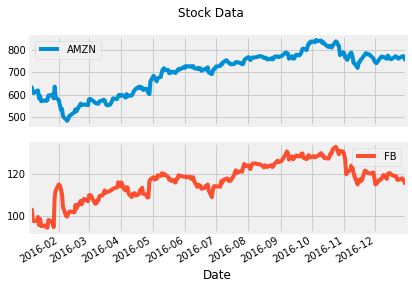

In [0]:
# visualize the stock_data
df_stock_data.plot(title='Stock Data', subplots=True)

# summarize the stock_data
df_stock_data.describe()

## **Visualize & summarize daily values for the S&P 500**

Let's also take a closer look at the value of the S&P 500, our benchmark.

,S&P 500
count,251.000000
mean,196.337968
std,10.509757
min,169.960000
25%,190.995000
50%,197.130000
75%,204.015000
max,214.970000


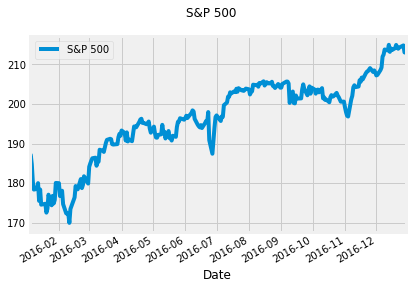

In [0]:
# plot the benchmark_data
df_benchmark_data.plot(title='S&P 500', subplots=True)

# summarize the benchmark_data
df_benchmark_data.describe()

## **The inputs for the Sharpe Ratio: Starting with Daily Stock Returns**

The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. 

,AMZN,FB
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017850
min,-0.076100,-0.058105
25%,-0.007210,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008107
max,0.095664,0.155214


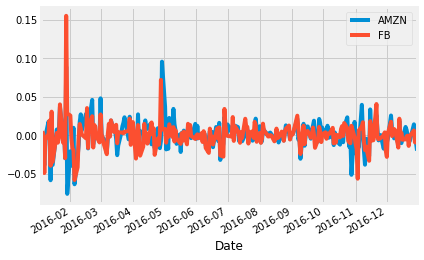

In [0]:
# calculate daily stock_data returns
stock_returns = df_stock_data.pct_change()

# plot the daily returns
stock_returns.plot()


# summarize the daily returns
stock_returns.describe()

## **Daily S&P 500 returns**

For the S&P 500, calculating daily returns works just the same way, we just need to make sure we select it as a Series using single brackets [] and not as a DataFrame to facilitate the calculations in the next step.

count    250.000000
mean       0.000558
std        0.008206
min       -0.035915
25%       -0.002728
50%        0.000494
75%        0.004507
max        0.024350
Name: S&P 500, dtype: float64

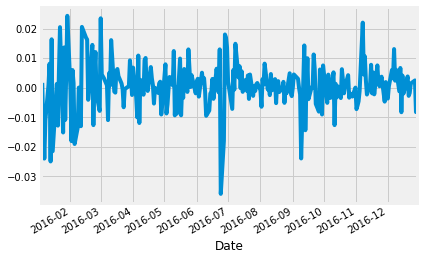

In [0]:
# calculate daily benchmark_data returns
sp_returns = df_benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot()

# summarize the daily returns
sp_returns.describe()

## **Calculating Excess Returns for Amazon and Facebook vs. S&P 500**

Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,AMZN,FB
count,250.000000,250.000000
mean,0.000343,0.000115
std,0.016167,0.015469
min,-0.100450,-0.051784
25%,-0.006315,-0.005385
50%,0.000788,-0.000587
75%,0.007187,0.005610
max,0.101082,0.150010


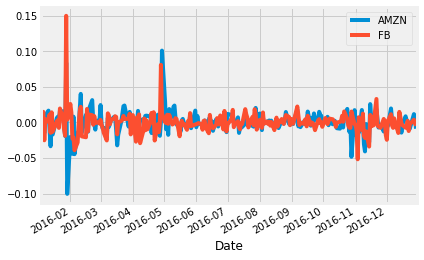

In [0]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

## **The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500**

Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

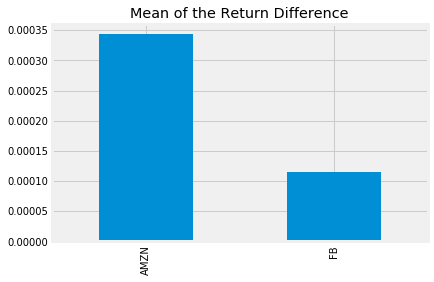

In [0]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference')

## **The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference**

It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

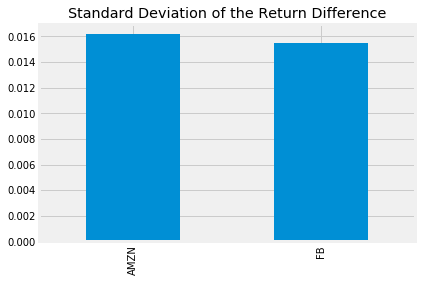

In [0]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

## **Putting it all together**

Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

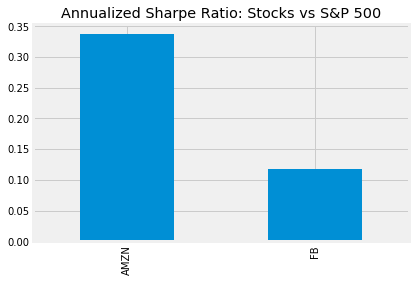

In [0]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')